In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from random import randint
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bankruptcy_Prediction/data.csv')
pd.set_option('display.max_column', None)
data

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

# Data Analyzing

In [4]:
data.shape

(6819, 96)

In [5]:
data.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Therefore, there are no missing or NaN values present in our dataset. So, we can directly proceed further into analysing our data.

Let's visualize our dataset. Plotting graphs would help us determine of the class is balanced or imbalanced. 

In [8]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

This common color pallete is available online and is used majorly to ease the visualization of data.

In [9]:

data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

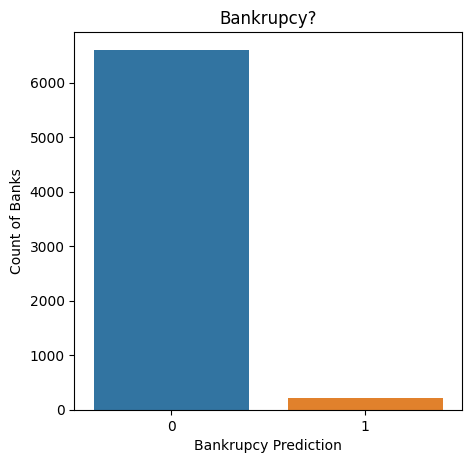

In [10]:
plt.figure(figsize = (5,5), dpi = 100)
sns.countplot('Bankrupt?',data = data)
plt.xlabel('Bankrupcy Prediction')
plt.ylabel('Count of Banks')
plt.title('Bankrupcy?')
plt.show()

So according to the graph plotted we can infer that the data is highly unbalanced.

Let's seperate the categorical and numerical values and visualize them further in accordance with bankrupcy.

In [11]:
# The columns that have int values are categorical while the columns having float values are numerical.

Numerical_values = data.dtypes[data.dtypes != 'int64'].index
Categorical_values = data.dtypes[data.dtypes == 'int64'].index

data[Categorical_values].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

So, here we can see that there are only Three categorical Columns. Let's visualize them...

In [12]:
value = randint(0,len(colors)-1)

In [13]:
data[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

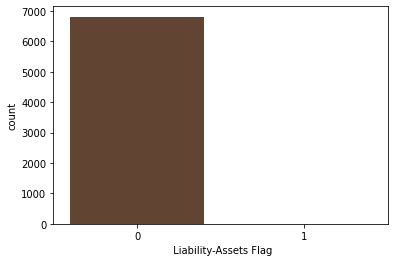

In [14]:
sns.countplot(' Liability-Assets Flag',data = data, palette = colors[value])

 Liability-Assets Flag  Bankrupt?
0                       0            6597
                        1             214
1                       1               6
                        0               2
dtype: int64


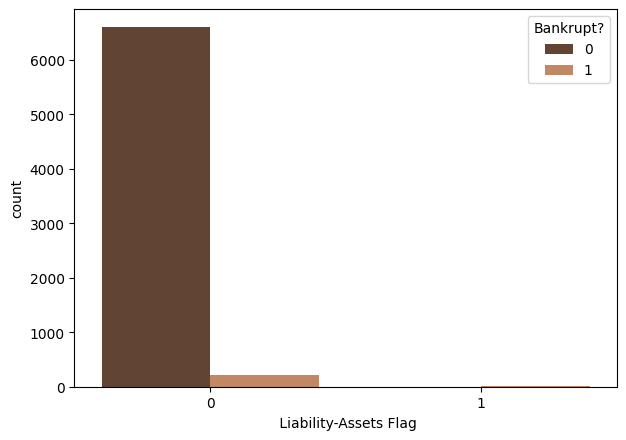

In [15]:
print(data[[' Liability-Assets Flag','Bankrupt?']].value_counts())
plt.figure(figsize = (7,5),dpi = 100)
sns.countplot(x = ' Liability-Assets Flag',hue = 'Bankrupt?', data = data, 
             palette = colors[value])

For the companies who went bankrupt are very small and the assets are more than liability which is good.

In [16]:
data[' Net Income Flag'].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

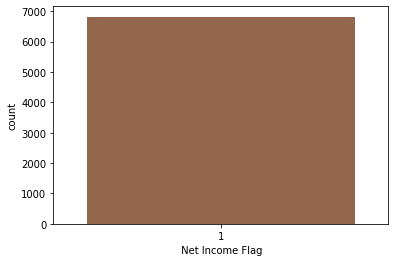

In [17]:
sns.countplot(' Net Income Flag',data = data, palette = colors[value])

 Net Income Flag  Bankrupt?
1                 0            6599
                  1             220
dtype: int64


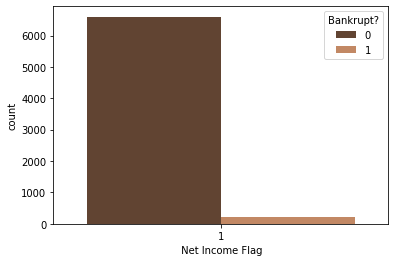

In [18]:
print(data[[' Net Income Flag','Bankrupt?']].value_counts())
sns.countplot(x = ' Net Income Flag',hue = 'Bankrupt?',data = data, palette = colors[value])

The organisations have suffered losses for the past years and now have stabilised their incomes.

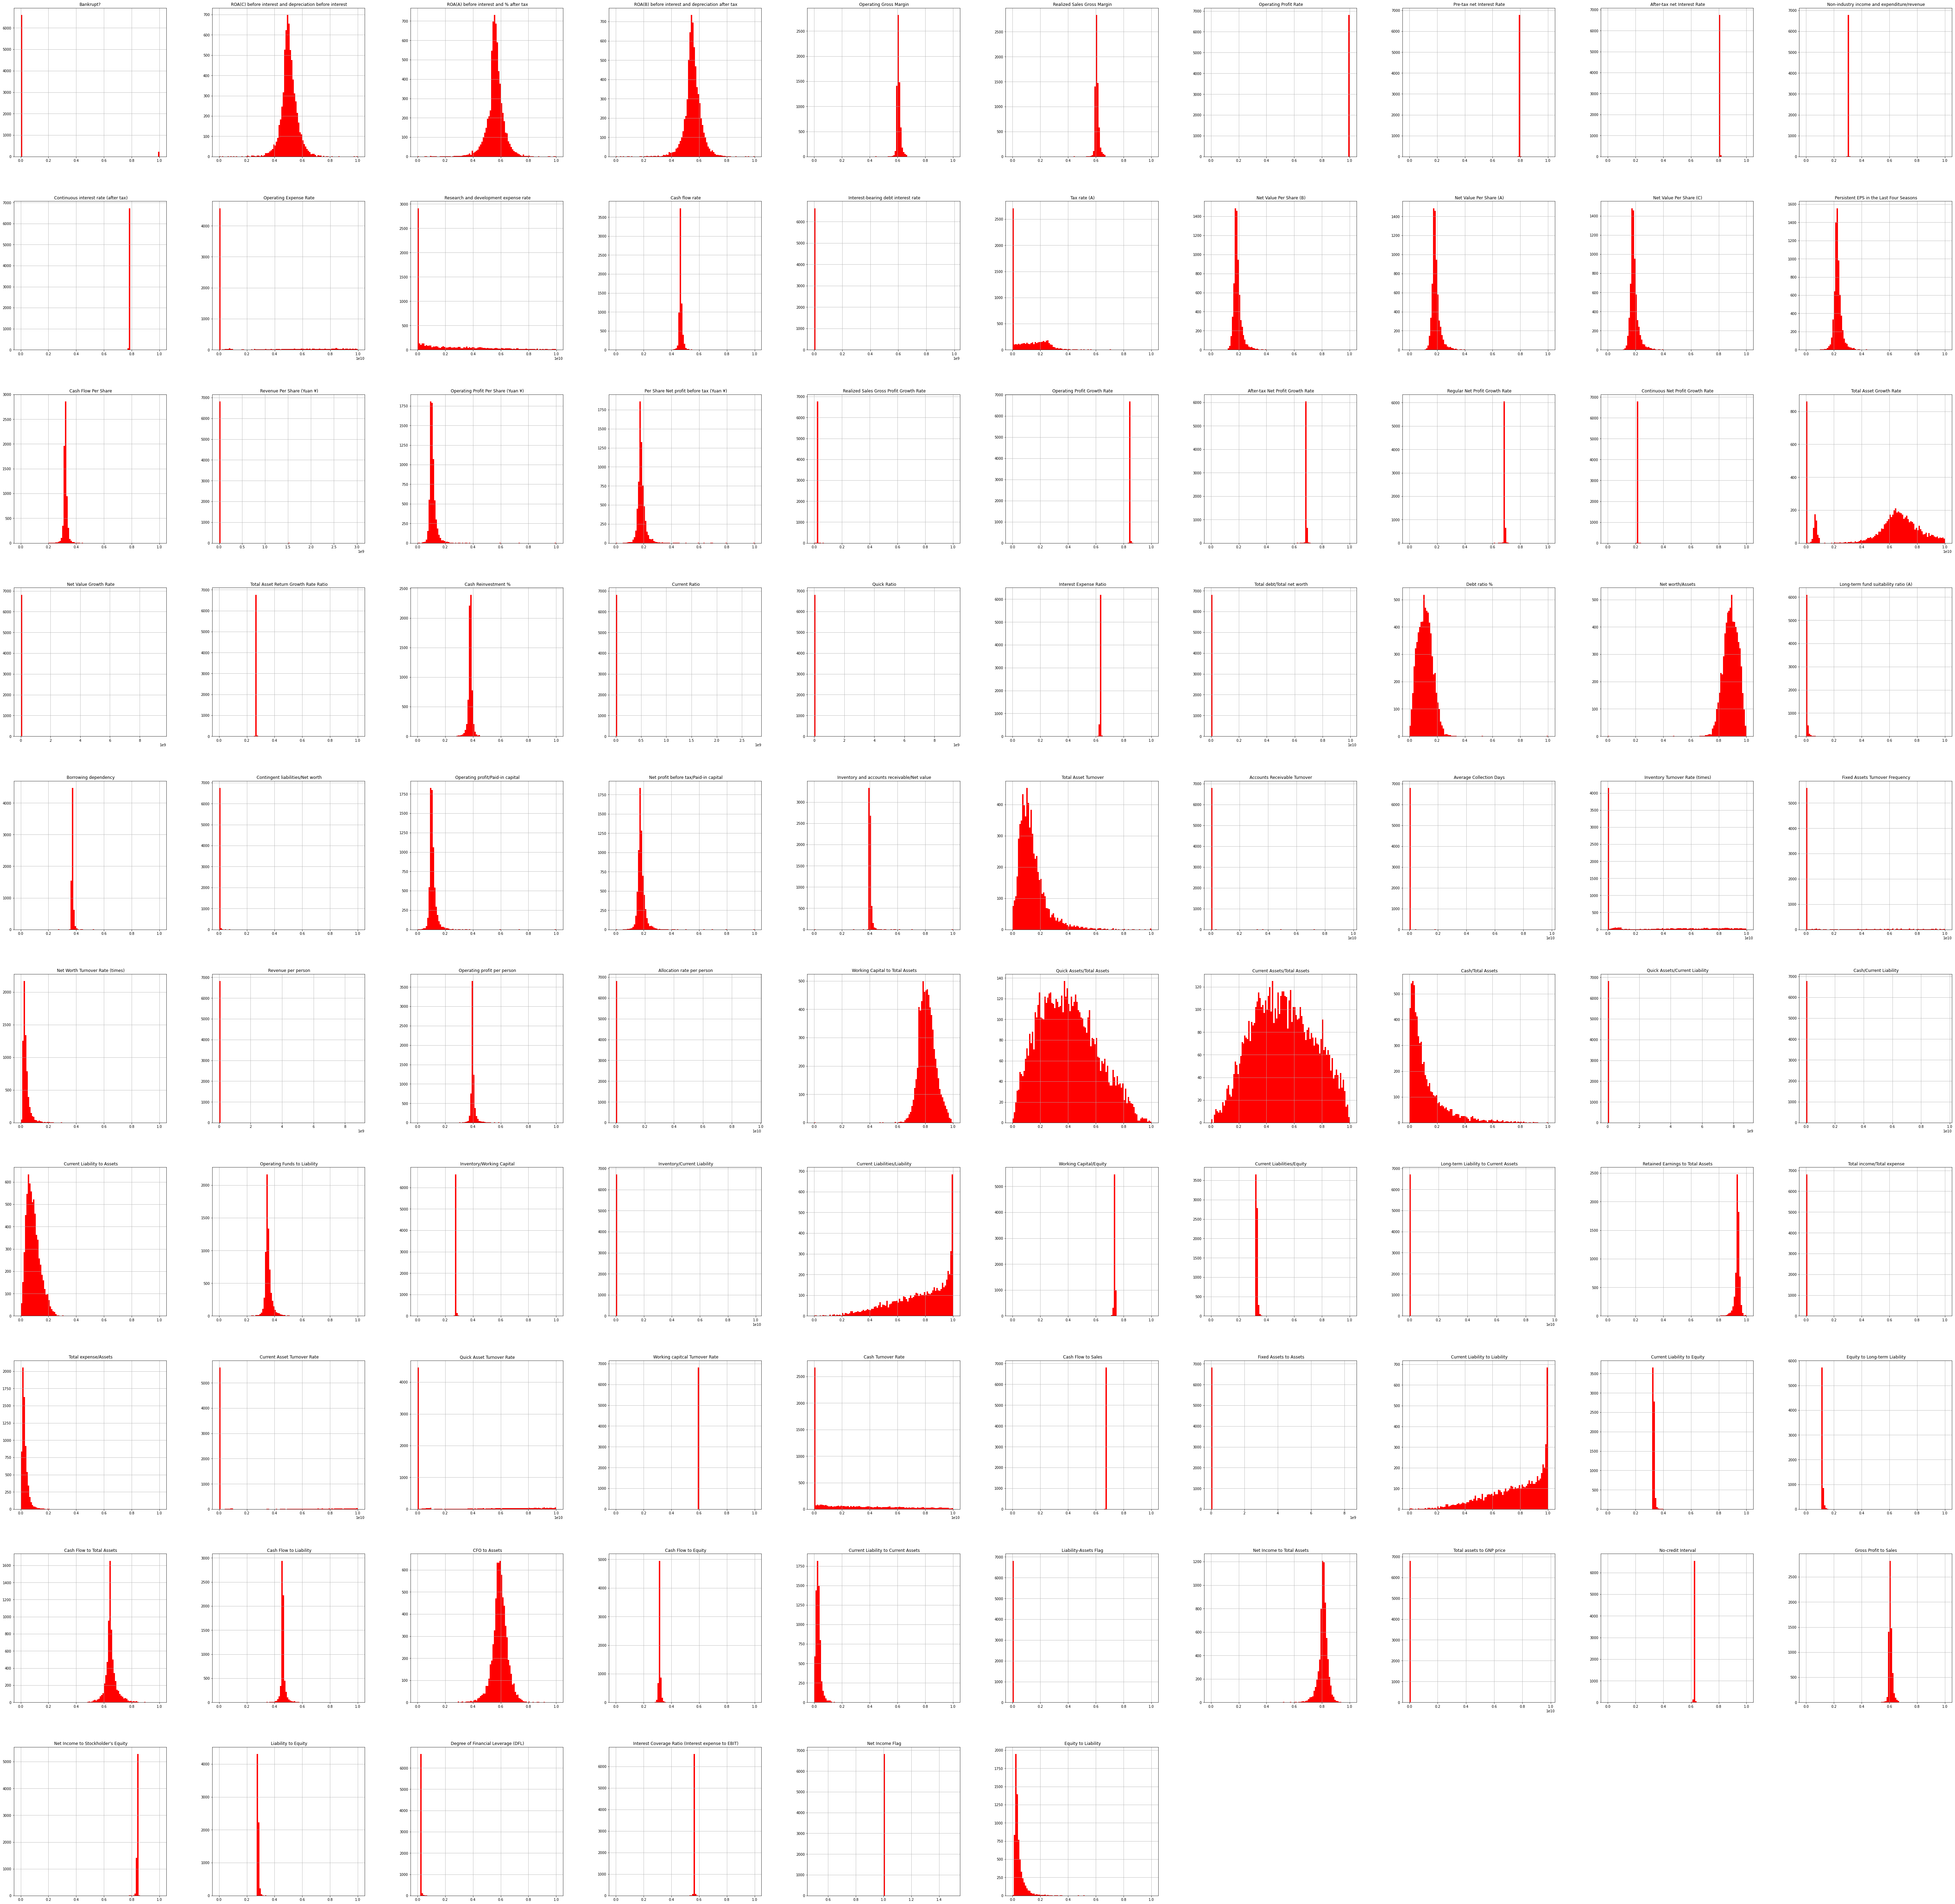

In [19]:
data.hist(bins = 100, figsize = (100,100),color = 'red')
plt.show()

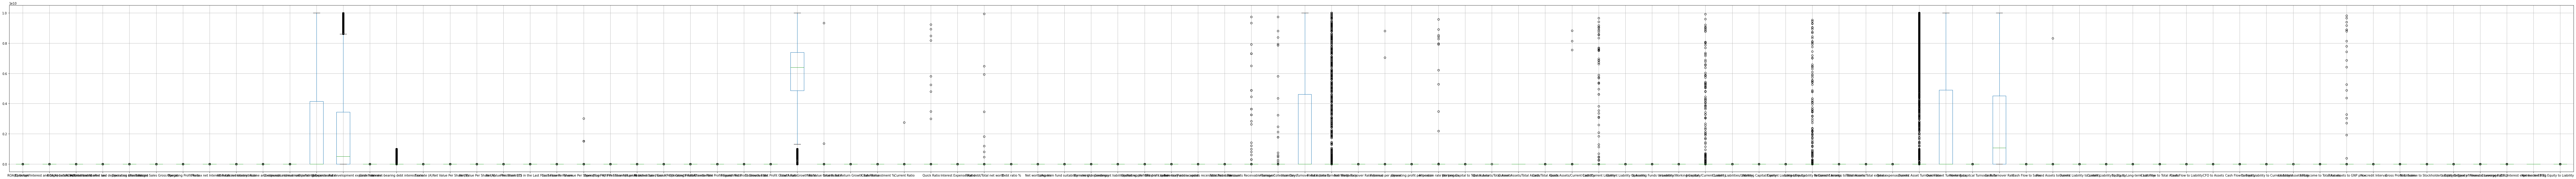

In [20]:
plt.figure(figsize = (150,10))
data.boxplot()

Now, Let's explore the numerical columns and plot some correlations between them.

In [21]:
data.corr()

Bankrupt?  \
Bankrupt?                                            1.000000   
 ROA(C) before interest and depreciation before...  -0.260807   
 ROA(A) before interest and % after tax             -0.282941   
 ROA(B) before interest and depreciation after tax  -0.273051   
 Operating Gross Margin                             -0.100043   
...                                                       ...   
 Liability to Equity                                 0.166812   
 Degree of Financial Leverage (DFL)                  0.010508   
 Interest Coverage Ratio (Interest expense to E...  -0.005509   
 Net Income Flag                                          NaN   
 Equity to Liability                                -0.083048   

                                                     ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807          
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
...                                                                                               ...          
 Liability to Equity                                                                        -0.143629          
 Degree of Financial Leverage (DFL)                                                         -0.016575          
 Interest Coverage Ratio (Interest expense to E...                                           0.010573          
 Net Income Flag                                                                                  NaN          
 Equity to Liability                                                                         0.052416          

                                                     ROA(A) before interest and % after tax  \
Bankrupt?                                                                         -0.282941   
 ROA(C) before interest and depreciation before...                                 0.940124   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955741   
 Operating Gross Margin                                                            0.326969   
...                                                                                     ...   
 Liability to Equity                                                              -0.141039   
 Degree of Financial Leverage (DFL)                                               -0.011515   
 Interest Coverage Ratio (Interest expense to E...                                 0.013372   
 Net Income Flag                                                                        NaN   
 Equity to Liability                                                               0.057887   

                                                     ROA(B) before interest and depreciation after tax  \
Bankrupt?                                                                                   -0.273051    
 ROA(C) before interest and depreciation before...                                           0.986849    
 ROA(A) before interest and % after tax                                                      0.955741    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.333749    
...                                                                                               ...    
 Liability to Equity                       

In [22]:
data[Numerical_values].corr()

ROA(C) before interest and depreciation before interest  \
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
 Realized Sales Gross Margin                                                                 0.332755          
...                                                                                               ...          
 Net Income to Stockholder's Equity                                                          0.274287          
 Liability to Equity                                                                        -0.143629          
 Degree of Financial Leverage (DFL)                                                         -0.016575          
 Interest Coverage Ratio (Interest expense to E...                                           0.010573          
 Equity to Liability                                                                         0.052416          

                                                     ROA(A) before interest and % after tax  \
 ROA(C) before interest and depreciation before...                                 0.940124   
 ROA(A) before interest and % after tax                                            1.000000   
 ROA(B) before interest and depreciation after tax                                 0.955741   
 Operating Gross Margin                                                            0.326969   
 Realized Sales Gross Margin                                                       0.324956   
...                                                                                     ...   
 Net Income to Stockholder's Equity                                                0.291744   
 Liability to Equity                                                              -0.141039   
 Degree of Financial Leverage (DFL)                                               -0.011515   
 Interest Coverage Ratio (Interest expense to E...                                 0.013372   
 Equity to Liability                                                               0.057887   

                                                     ROA(B) before interest and depreciation after tax  \
 ROA(C) before interest and depreciation before...                                           0.986849    
 ROA(A) before interest and % after tax                                                      0.955741    
 ROA(B) before interest and depreciation after tax                                           1.000000    
 Operating Gross Margin                                                                      0.333749    
 Realized Sales Gross Margin                                                                 0.331755    
...                                                                                               ...    
 Net Income to Stockholder's Equity                                                          0.280617    
 Liability to Equity                                                                        -0.142838    
 Degree of Financial Leverage (DFL)                                                         -0.014663    
 Interest Coverage Ratio (Interest expense to E...                                           0.011473    
 Equity to Liability                                                                         0.056430    

                                                     Operating Gross Margin  \
 ROA(C) before interest and depreciation before...                 0.334719   
 ROA(A) before interest and % after tax                            0.326969   
 ROA(B) before interest and depreciation after tax       

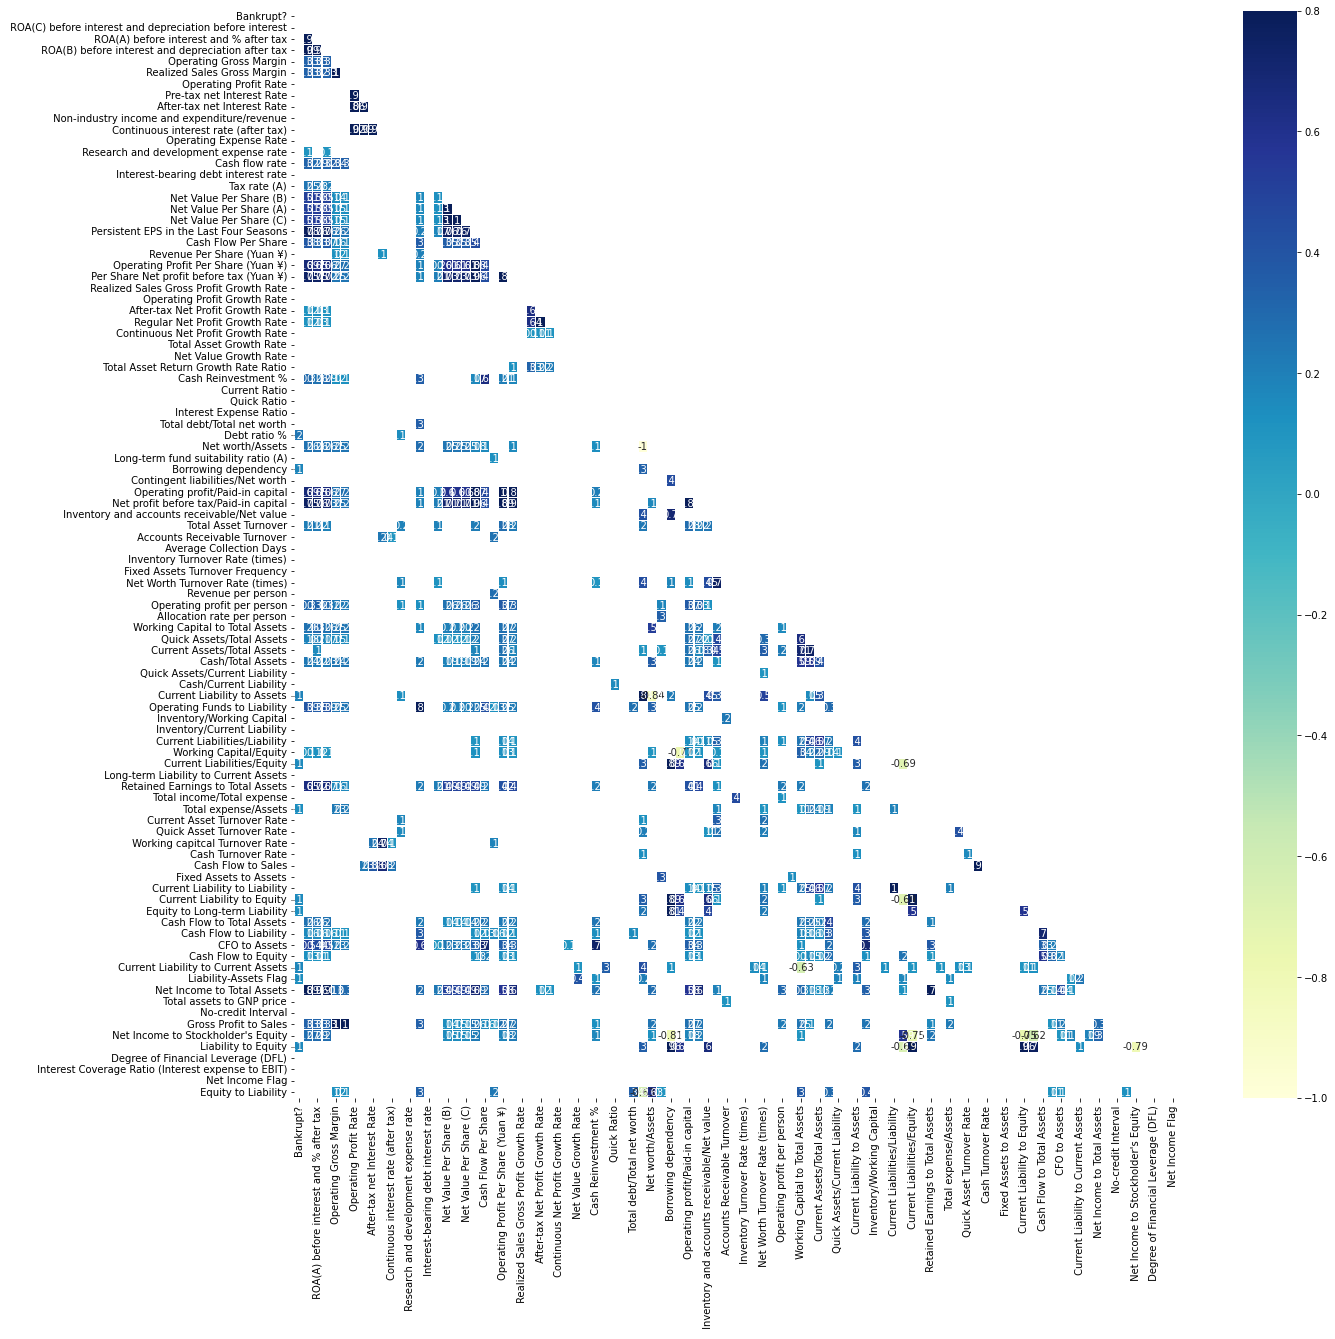

In [23]:
# Let's plot the heatmap for all the variables (numerical + categorical) and view their correlation
corrmat = data.corr()
figure, ax  = plt.subplots(figsize =(20,20))
matrix = np.triu(corrmat) # upper traingle within range of corrmat provided
colormap = sns.color_palette('YlGnBu',as_cmap= True)
sns.heatmap(corrmat[(corrmat >=0.1)|(corrmat <= -0.6)], annot = True,vmax=.8, mask=matrix, ax=ax,cmap = colormap,linewidths=0.1)

Let's create instances for positive and negative correlations.

In [24]:
positive_corr = data[Numerical_values].corrwith(data['Bankrupt?']).sort_values(ascending = False)[:6].index.tolist()
negative_corr = data[Numerical_values].corrwith(data['Bankrupt?']).sort_values()[:6].index.tolist()

positive_corr = data[positive_corr + ['Bankrupt?']].copy()
negative_corr = data[negative_corr + ['Bankrupt?']].copy()

In [25]:
positive_corr

Debt ratio %   Current Liability to Assets   Borrowing dependency  \
0          0.207576                      0.147308               0.390284   
1          0.171176                      0.056963               0.376760   
2          0.207516                      0.098162               0.379093   
3          0.151465                      0.098715               0.379743   
4          0.106509                      0.110195               0.375025   
...             ...                           ...                    ...   
6814       0.124618                      0.103838               0.373823   
6815       0.099253                      0.089901               0.372505   
6816       0.038939                      0.024414               0.369637   
6817       0.086979                      0.083199               0.369649   
6818       0.014149                      0.018517               0.370049   

       Current Liability to Current Assets   Liability to Equity  \
0                                 0.118250              0.290202   
1                                 0.047775              0.283846   
2                                 0.025346              0.290189   
3                                 0.067250              0.281721   
4                                 0.047725              0.278514   
...                                    ...                   ...   
6814                              0.027951              0.279606   
6815                              0.031470              0.278132   
6816                              0.007542              0.275789   
6817                              0.022916              0.277547   
6818                              0.005579              0.275114   

       Current Liabilities/Equity  Bankrupt?  
0                        0.339077          1  
1                        0.329740          1  
2                        0.334777          1  
3                        0.331509          1  
4                        0.330726          1  
...                           ...        ...  
6814                     0.330914          0  
6815                     0.329753          0  
6816                     0.326921          0  
6817                     0.329294          0  
6818                     0.326690          0  

[6819 rows x 7 columns]

In [26]:
negative_corr

Net Income to Total Assets   ROA(A) before interest and % after tax  \
0                        0.716845                                 0.424389   
1                        0.795297                                 0.538214   
2                        0.774670                                 0.499019   
3                        0.739555                                 0.451265   
4                        0.795016                                 0.538432   
...                           ...                                      ...   
6814                     0.799927                                 0.539468   
6815                     0.799748                                 0.538269   
6816                     0.797778                                 0.533744   
6817                     0.811808                                 0.559911   
6818                     0.815956                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       Net worth/Assets   Persistent EPS in the Last Four Seasons  Bankrupt?  
0              0.792424                                  0.169141          1  
1              0.828824                                  0.208944          1  
2              0.792484                                  0.180581          1  
3              0.848535                                  0.193722          1  
4              0.893491                                  0.212537          1  
...                 ...                                       ...        ...  
6814           0.875382                                  0.216602          0  
6815           0.900747                                  0.216697          0  
6816           0.961061                                  0.210929          0  
6817           0.913021                                  0.228326          0  
6818           0.985851                                  0.227758          0  

[6819 rows x 7 columns]

Here, we create tables such that we can analyse the positively and negatively correlated instances. 

In [27]:
def corr_relation(x_value, y_value):
  for i in range(1,7):
    plt.figure(figsize = (10,5), dpi = 120)
    plt.subplot(2,3,i)
    sns.barplot(x = x_value, y= y_value[i-1], data = data, palette = colors[value])

    plt.tight_layout(pad= 0.3)


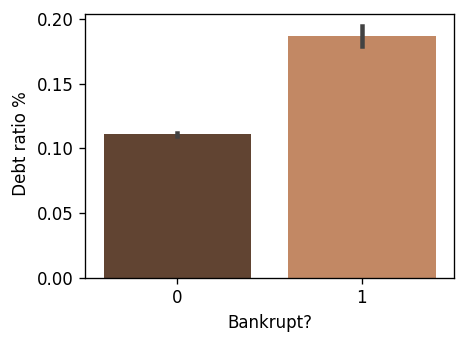

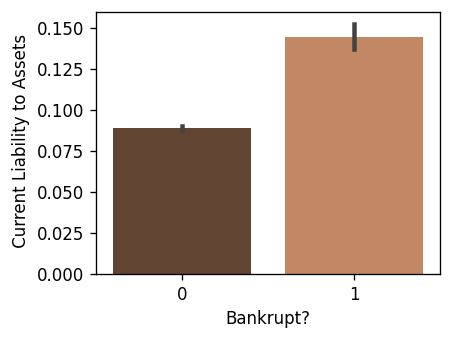

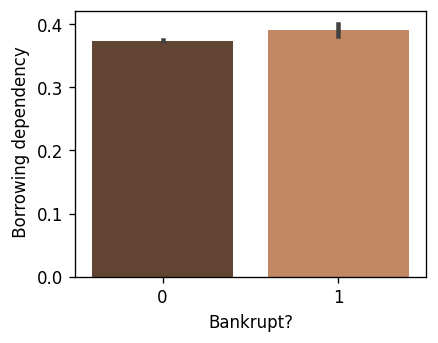

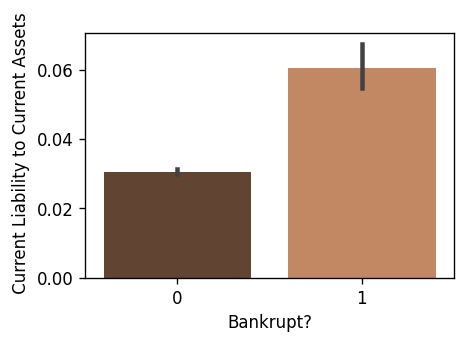

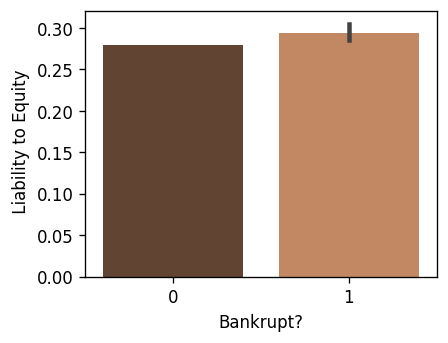

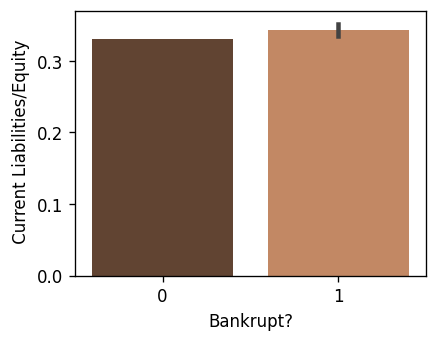

In [28]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corr_relation(x_value,y_value)

We notice that three factors: Debt Ratio%, Current Liability to Assets and Current Liability to Current Assets have a high influence on companies undergoing bankrupcy.

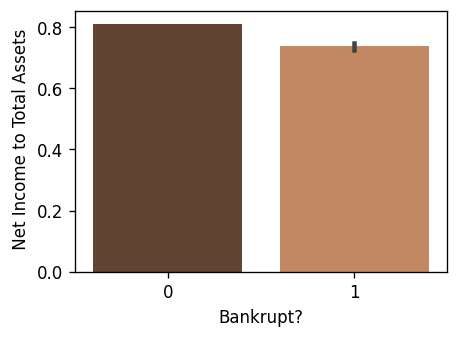

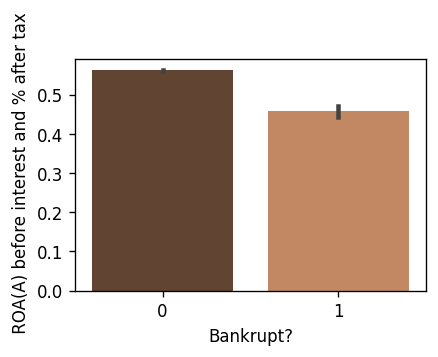

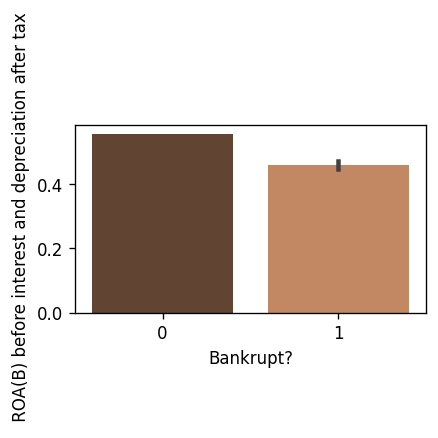

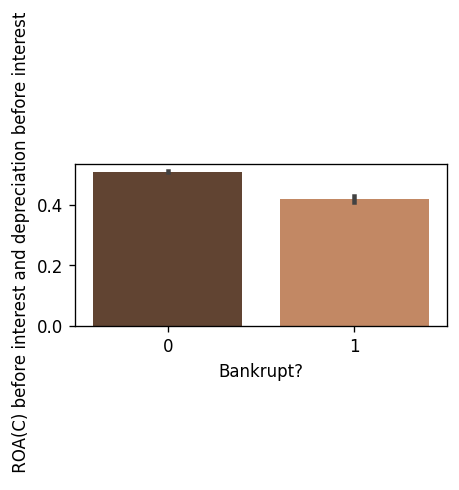

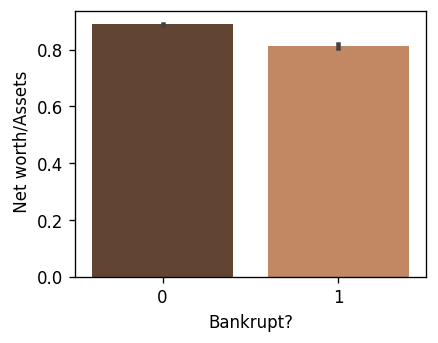

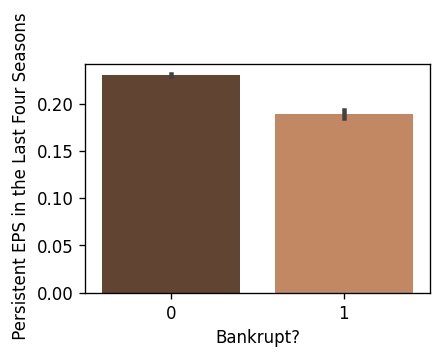

In [29]:
# Now Let's do the same for negatively correlated factors
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corr_relation(x_value, y_value)

This tells us that if the company has more assets for itself it is less likely to go bankrupt.

Now, let's see the correlation between positive and negative corr values.

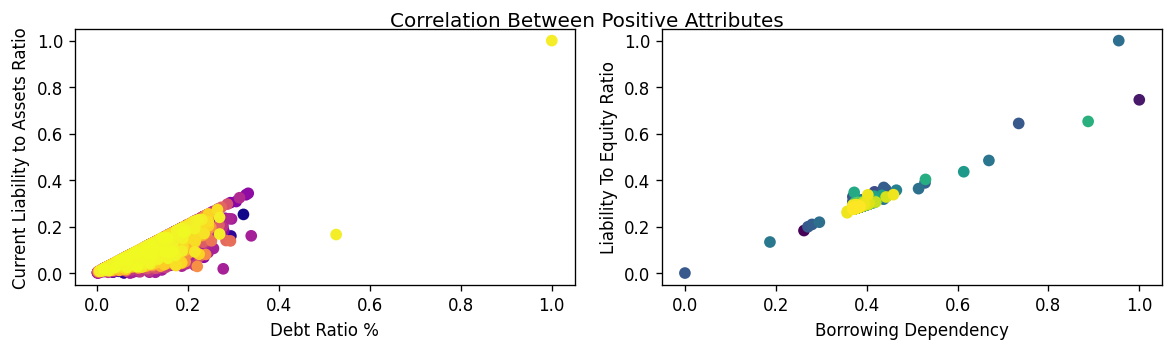

In [30]:
plt.figure(figsize = (10,3),dpi = 120)

plt.suptitle('Correlation Between Positive Attributes')
x = np.arange(6819)
y = x
t = x
plt.subplot(1,2,1)
plt.scatter(data[' Debt ratio %'],data[' Current Liability to Assets'], c = t, cmap= 'plasma')
plt.xlabel('Debt Ratio %')
plt.ylabel('Current Liability to Assets Ratio')

plt.subplot(1,2,2)
plt.scatter(data[' Borrowing dependency'], data[' Liability to Equity'],c = t,  cmap = 'viridis')
plt.xlabel('Borrowing Dependency')
plt.ylabel('Liability To Equity Ratio')

plt.tight_layout(pad= 1.5)

There is a positive correlation between attributes.

Now, Let's visualize the relatioship between negative attributes.

Text(0, 0.5, 'ROA (C)')

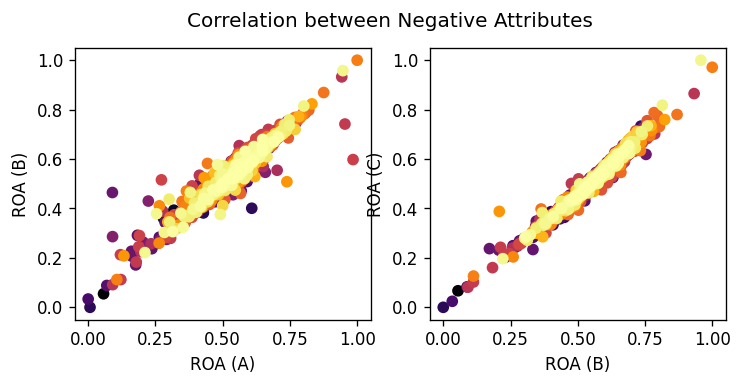

In [31]:
plt.figure(figsize = (7,3), dpi = 120)
plt.suptitle('Correlation between Negative Attributes')

x= np.arange(6819)
y =x
t = x
plt.subplot(1,2,1)
plt.scatter(data[' ROA(A) before interest and % after tax'], data[' ROA(B) before interest and depreciation after tax'],c= t, cmap = 'inferno')
plt.xlabel('ROA (A)')
plt.ylabel('ROA (B)')

plt.subplot(1,2,2)
plt.scatter(data[' ROA(B) before interest and depreciation after tax'],data[' ROA(C) before interest and depreciation before interest'],c=t, cmap= 'inferno')
plt.xlabel('ROA (B)')
plt.ylabel('ROA (C)')

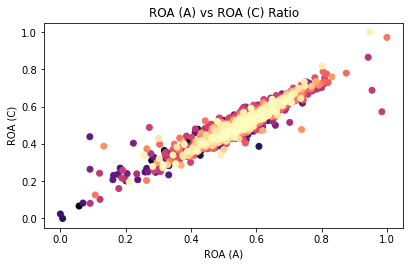

In [32]:
plt.scatter(data[' ROA(A) before interest and % after tax'], data[' ROA(C) before interest and depreciation before interest'],c= t, cmap = 'magma')
plt.xlabel('ROA (A)')
plt.ylabel("ROA (C)")
plt.title('ROA (A) vs ROA (C) Ratio')

plt.tight_layout(pad = 1.8)

So, it can be seen that there is also a positive realation between attributes which have low correlation with target variable.

Let's now plot a heatmap of relation between positive and negative attributes.

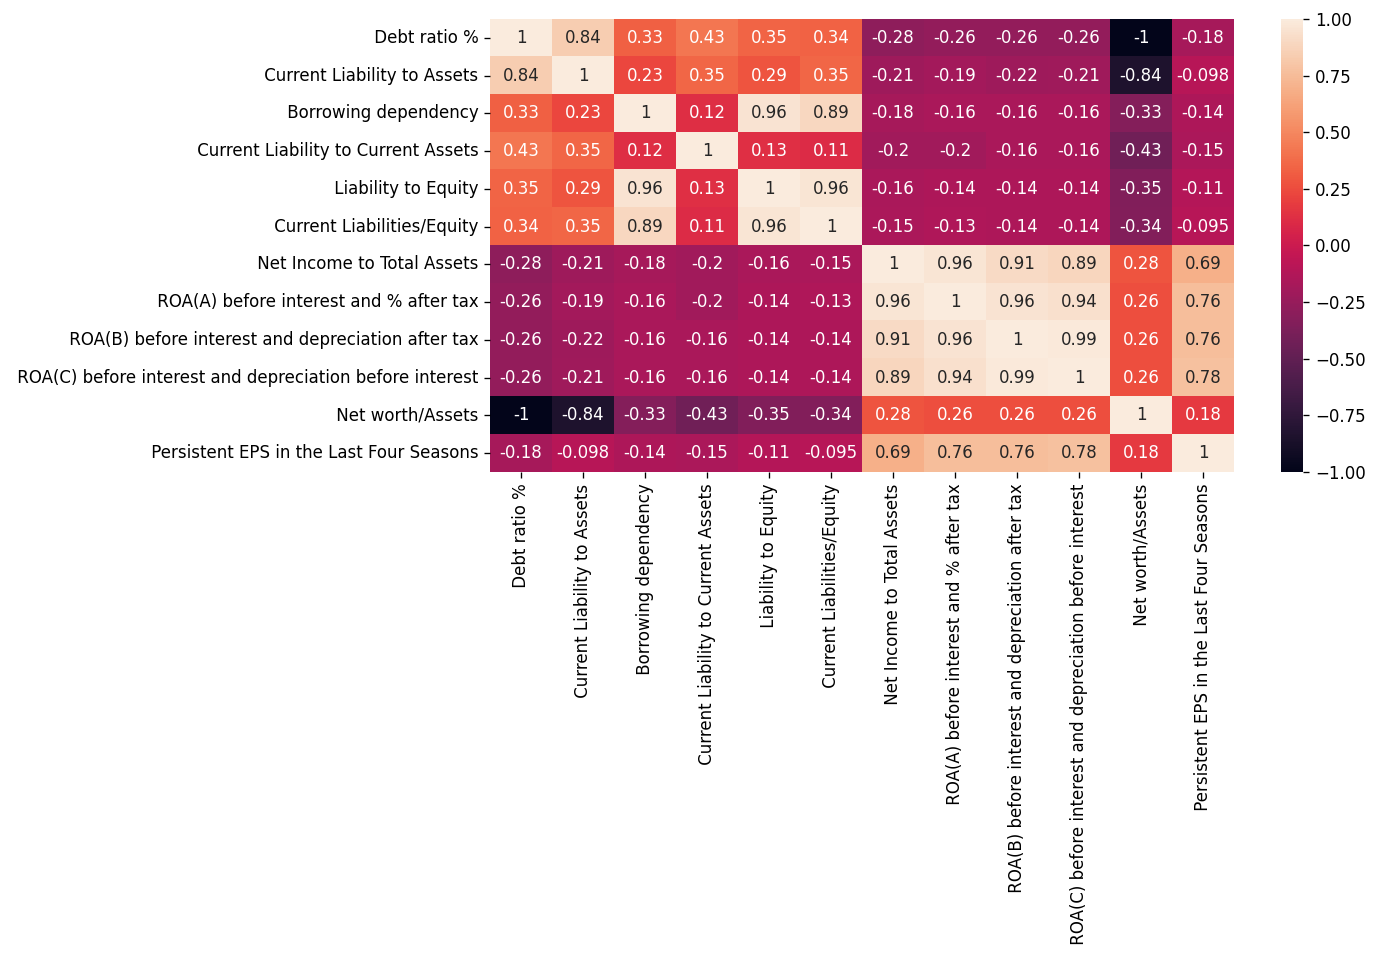

In [33]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]

plt.figure(figsize = (10,5), dpi = 120)
colormap= sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(data[relation].corr(),annot = True)

This is the correlation heatmap of top 12 attributes.
We observe that there is a high correlation between negative and positive attributes. Here, the Debt Ratio % has a negative correlation with Net Worth/Assets.

---



After visualizing the dataset we found that our data is highly imbalanced which needs to be fixed before splitting it into train and test sets or else the model applied would predict every company to not go bankrupt.

# Imbalance Data Modelling
Let's normalize and standardise our data first and then explore other ways by which we can minimise the imbalance in our dataset. 

In [34]:
# Let's Normalize
from sklearn import preprocessing

normalized = preprocessing.normalize(data)
print('Normalized data= ', normalized)

Normalized data=  [[1.20909116e-10 4.48082239e-11 5.13125526e-11 ... 6.81988002e-11
  1.20909116e-10 1.99122090e-12]
 [7.23671680e-11 3.35994203e-11 3.89490324e-11 ... 4.12619462e-11
  7.23671680e-11 1.50482506e-12]
 [1.05928105e-10 4.51329223e-11 5.28601107e-11 ... 5.97123163e-11
  1.05928105e-10 1.74507171e-12]
 ...
 [0.00000000e+00 7.89189672e-11 8.91058437e-11 ... 9.43503165e-11
  1.66944908e-10 1.63019595e-11]
 [0.00000000e+00 5.34228214e-11 5.90837684e-11 ... 5.96526365e-11
  1.05523576e-10 4.64403424e-12]
 [0.00000000e+00 5.26281778e-11 6.08526029e-11 ... 6.03255537e-11
  1.06739352e-10 2.49665734e-11]]


In [35]:
normalized_data= pd.DataFrame(normalized, columns= data.columns)
normalized_data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0  1.209091e-10                                       4.480822e-11          
1  7.236717e-11                                       3.359942e-11          
2  1.059281e-10                                       4.513292e-11          
3  6.138820e-11                                       2.454570e-11          
4  7.822627e-11                                       3.637695e-11          

    ROA(A) before interest and % after tax  \
0                             5.131255e-11   
1                             3.894903e-11   
2                             5.286011e-11   
3                             2.770233e-11   
4                             4.211954e-11   

    ROA(B) before interest and depreciation after tax  \
0                                       4.905885e-11    
1                                       3.739429e-11    
2                                       5.002932e-11    
3                                       2.809942e-11    
4                                       4.085741e-11    

    Operating Gross Margin   Realized Sales Gross Margin  \
0             7.272166e-11                  7.272166e-11   
1             4.416098e-11                  4.416098e-11   
2             6.371046e-11                  6.370130e-11   
3             3.582254e-11                  3.582254e-11   
4             4.684060e-11                  4.684060e-11   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0            1.207845e-10                9.635092e-11   
1            7.229089e-11                5.770415e-11   
2            1.058071e-10                8.436150e-11   
3            6.130838e-11                4.892437e-11   
4            7.814594e-11                6.237497e-11   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                  9.779242e-11                                  3.659271e-11   
1                  5.856680e-11                                  2.196752e-11   
2                  8.563096e-11                                  3.199401e-11   
3                  4.966094e-11                                  1.862208e-11   
4                  6.330881e-11                                  2.373971e-11   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                           9.442819e-11             1.519790e-14   
1                           5.655537e-11             2.097092e-14   
2                           8.265400e-11             2.501277e-14   
3                           4.795898e-11             6.623102e-15   
4                           6.113774e-11             6.172053e-01   

    Research and development expense rate   Cash flow rate  \
0                                0.000000     5.539368e-11   
1                                0.000000     3.342403e-11   
2                                0.002701     4.857022e-11   
3                                0.000000     2.858882e-11   
4                                0.000000     3.619891e-11   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                          8.766788e-14            0.0   
1                          4.682624e-14            0.0   
2                          8.369157e-14            0.0   
3                          2.756606e-14            0.0   
4                          5.366859e-14            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0              1.788850e-11              1.788850e-11   
1              1.318899e-11              1.318899e-11   
2              1.884575e-11              1.884575e-11   
3              9.465232e-12              9.465232e-12   
4              1.310309e-11              1.310309e-11   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0              1.788850e-11                              2.045064e-11   
1              1.318899e-11                              1.512068e-11   
2              2.051964e-11      

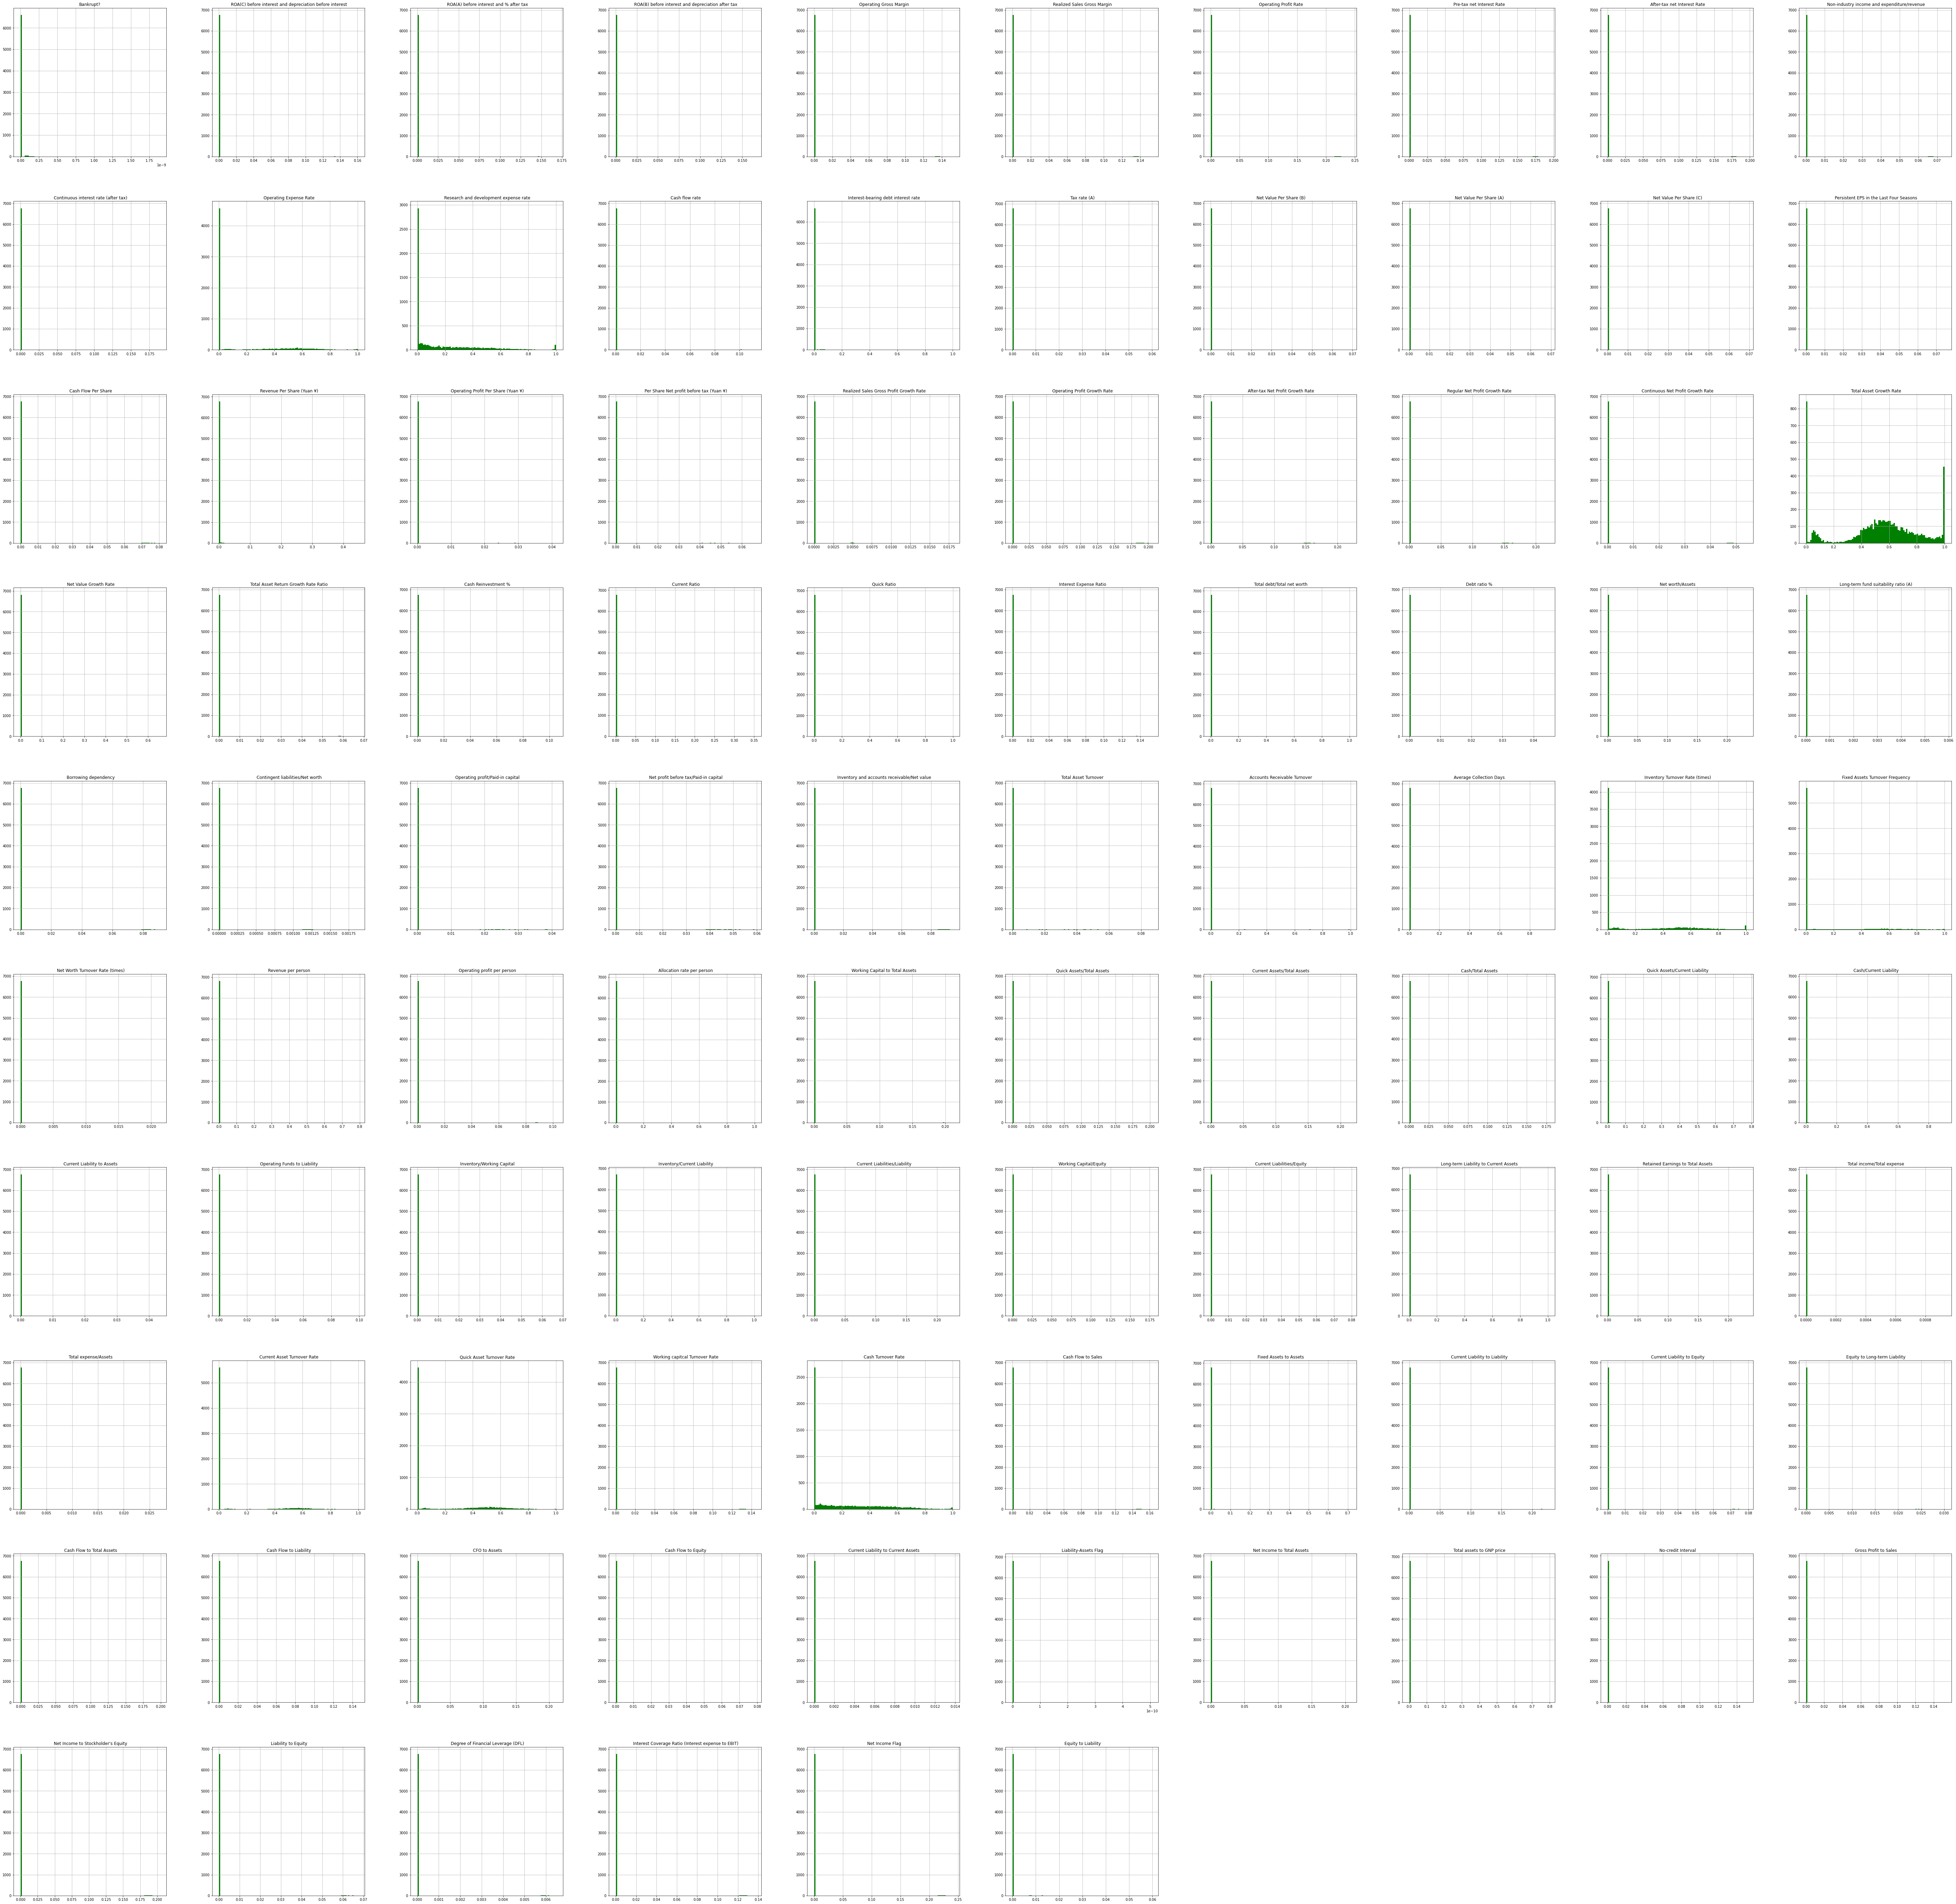

In [36]:
normalized_data.hist(bins= 100, figsize = (100,100), color = 'green')
plt.show()

Let's normalize the numerical columns only this time. 

In [37]:
Numerical_data = pd.DataFrame(data = data.drop(columns = ['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']),
                              columns = Numerical_values)
Numerical_data.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                                  0.180581   
3                  0.154187               

In [38]:
num_nor = preprocessing.normalize(Numerical_data)
print('Normalized Columns = ',num_nor)
normalized_NumData= pd.DataFrame(num_nor, columns= Numerical_values)
normalized_NumData.head()

Normalized Columns =  [[4.48082239e-11 5.13125526e-11 4.90588461e-11 ... 3.21625874e-12
  6.81988002e-11 1.99122090e-12]
 [3.35994203e-11 3.89490324e-11 3.73942880e-11 ... 1.91466752e-11
  4.12619462e-11 1.50482506e-12]
 [4.51329223e-11 5.28601107e-11 5.00293238e-11 ... 2.81289115e-12
  5.97123163e-11 1.74507171e-12]
 ...
 [7.89189672e-11 8.91058437e-11 8.69178881e-11 ... 4.47264719e-12
  9.43503165e-11 1.63019595e-11]
 [5.34228214e-11 5.90837684e-11 5.84647725e-11 ... 2.83035838e-12
  5.96526365e-11 4.64403424e-12]
 [5.26281778e-11 6.08526029e-11 5.86583571e-11 ... 2.85986241e-12
  6.03255537e-11 2.49665734e-11]]


ROA(C) before interest and depreciation before interest  \
0                                       4.480822e-11          
1                                       3.359942e-11          
2                                       4.513292e-11          
3                                       2.454570e-11          
4                                       3.637695e-11          

    ROA(A) before interest and % after tax  \
0                             5.131255e-11   
1                             3.894903e-11   
2                             5.286011e-11   
3                             2.770233e-11   
4                             4.211954e-11   

    ROA(B) before interest and depreciation after tax  \
0                                       4.905885e-11    
1                                       3.739429e-11    
2                                       5.002932e-11    
3                                       2.809942e-11    
4                                       4.085741e-11    

    Operating Gross Margin   Realized Sales Gross Margin  \
0             7.272166e-11                  7.272166e-11   
1             4.416098e-11                  4.416098e-11   
2             6.371046e-11                  6.370130e-11   
3             3.582254e-11                  3.582254e-11   
4             4.684060e-11                  4.684060e-11   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0            1.207845e-10                9.635092e-11   
1            7.229089e-11                5.770415e-11   
2            1.058071e-10                8.436150e-11   
3            6.130838e-11                4.892437e-11   
4            7.814594e-11                6.237497e-11   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                  9.779242e-11                                  3.659271e-11   
1                  5.856680e-11                                  2.196752e-11   
2                  8.563096e-11                                  3.199401e-11   
3                  4.966094e-11                                  1.862208e-11   
4                  6.330881e-11                                  2.373971e-11   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                           9.442819e-11             1.519790e-14   
1                           5.655537e-11             2.097092e-14   
2                           8.265400e-11             2.501277e-14   
3                           4.795898e-11             6.623102e-15   
4                           6.113774e-11             6.172053e-01   

    Research and development expense rate   Cash flow rate  \
0                                0.000000     5.539368e-11   
1                                0.000000     3.342403e-11   
2                                0.002701     4.857022e-11   
3                                0.000000     2.858882e-11   
4                                0.000000     3.619891e-11   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                          8.766788e-14            0.0   
1                          4.682624e-14            0.0   
2                          8.369157e-14            0.0   
3                          2.756606e-14            0.0   
4                          5.366859e-14            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0              1.788850e-11              1.788850e-11   
1              1.318899e-11              1.318899e-11   
2              1.884575e-11              1.884575e-11   
3              9.465232e-12              9.465232e-12   
4              1.310309e-11              1.310309e-11   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0              1.788850e-11                              2.045064e-11   
1              1.318899e-11                              1.512068e-11   
2              2.051964e-11                              1.912855e-11   
3              9.465232e-12               

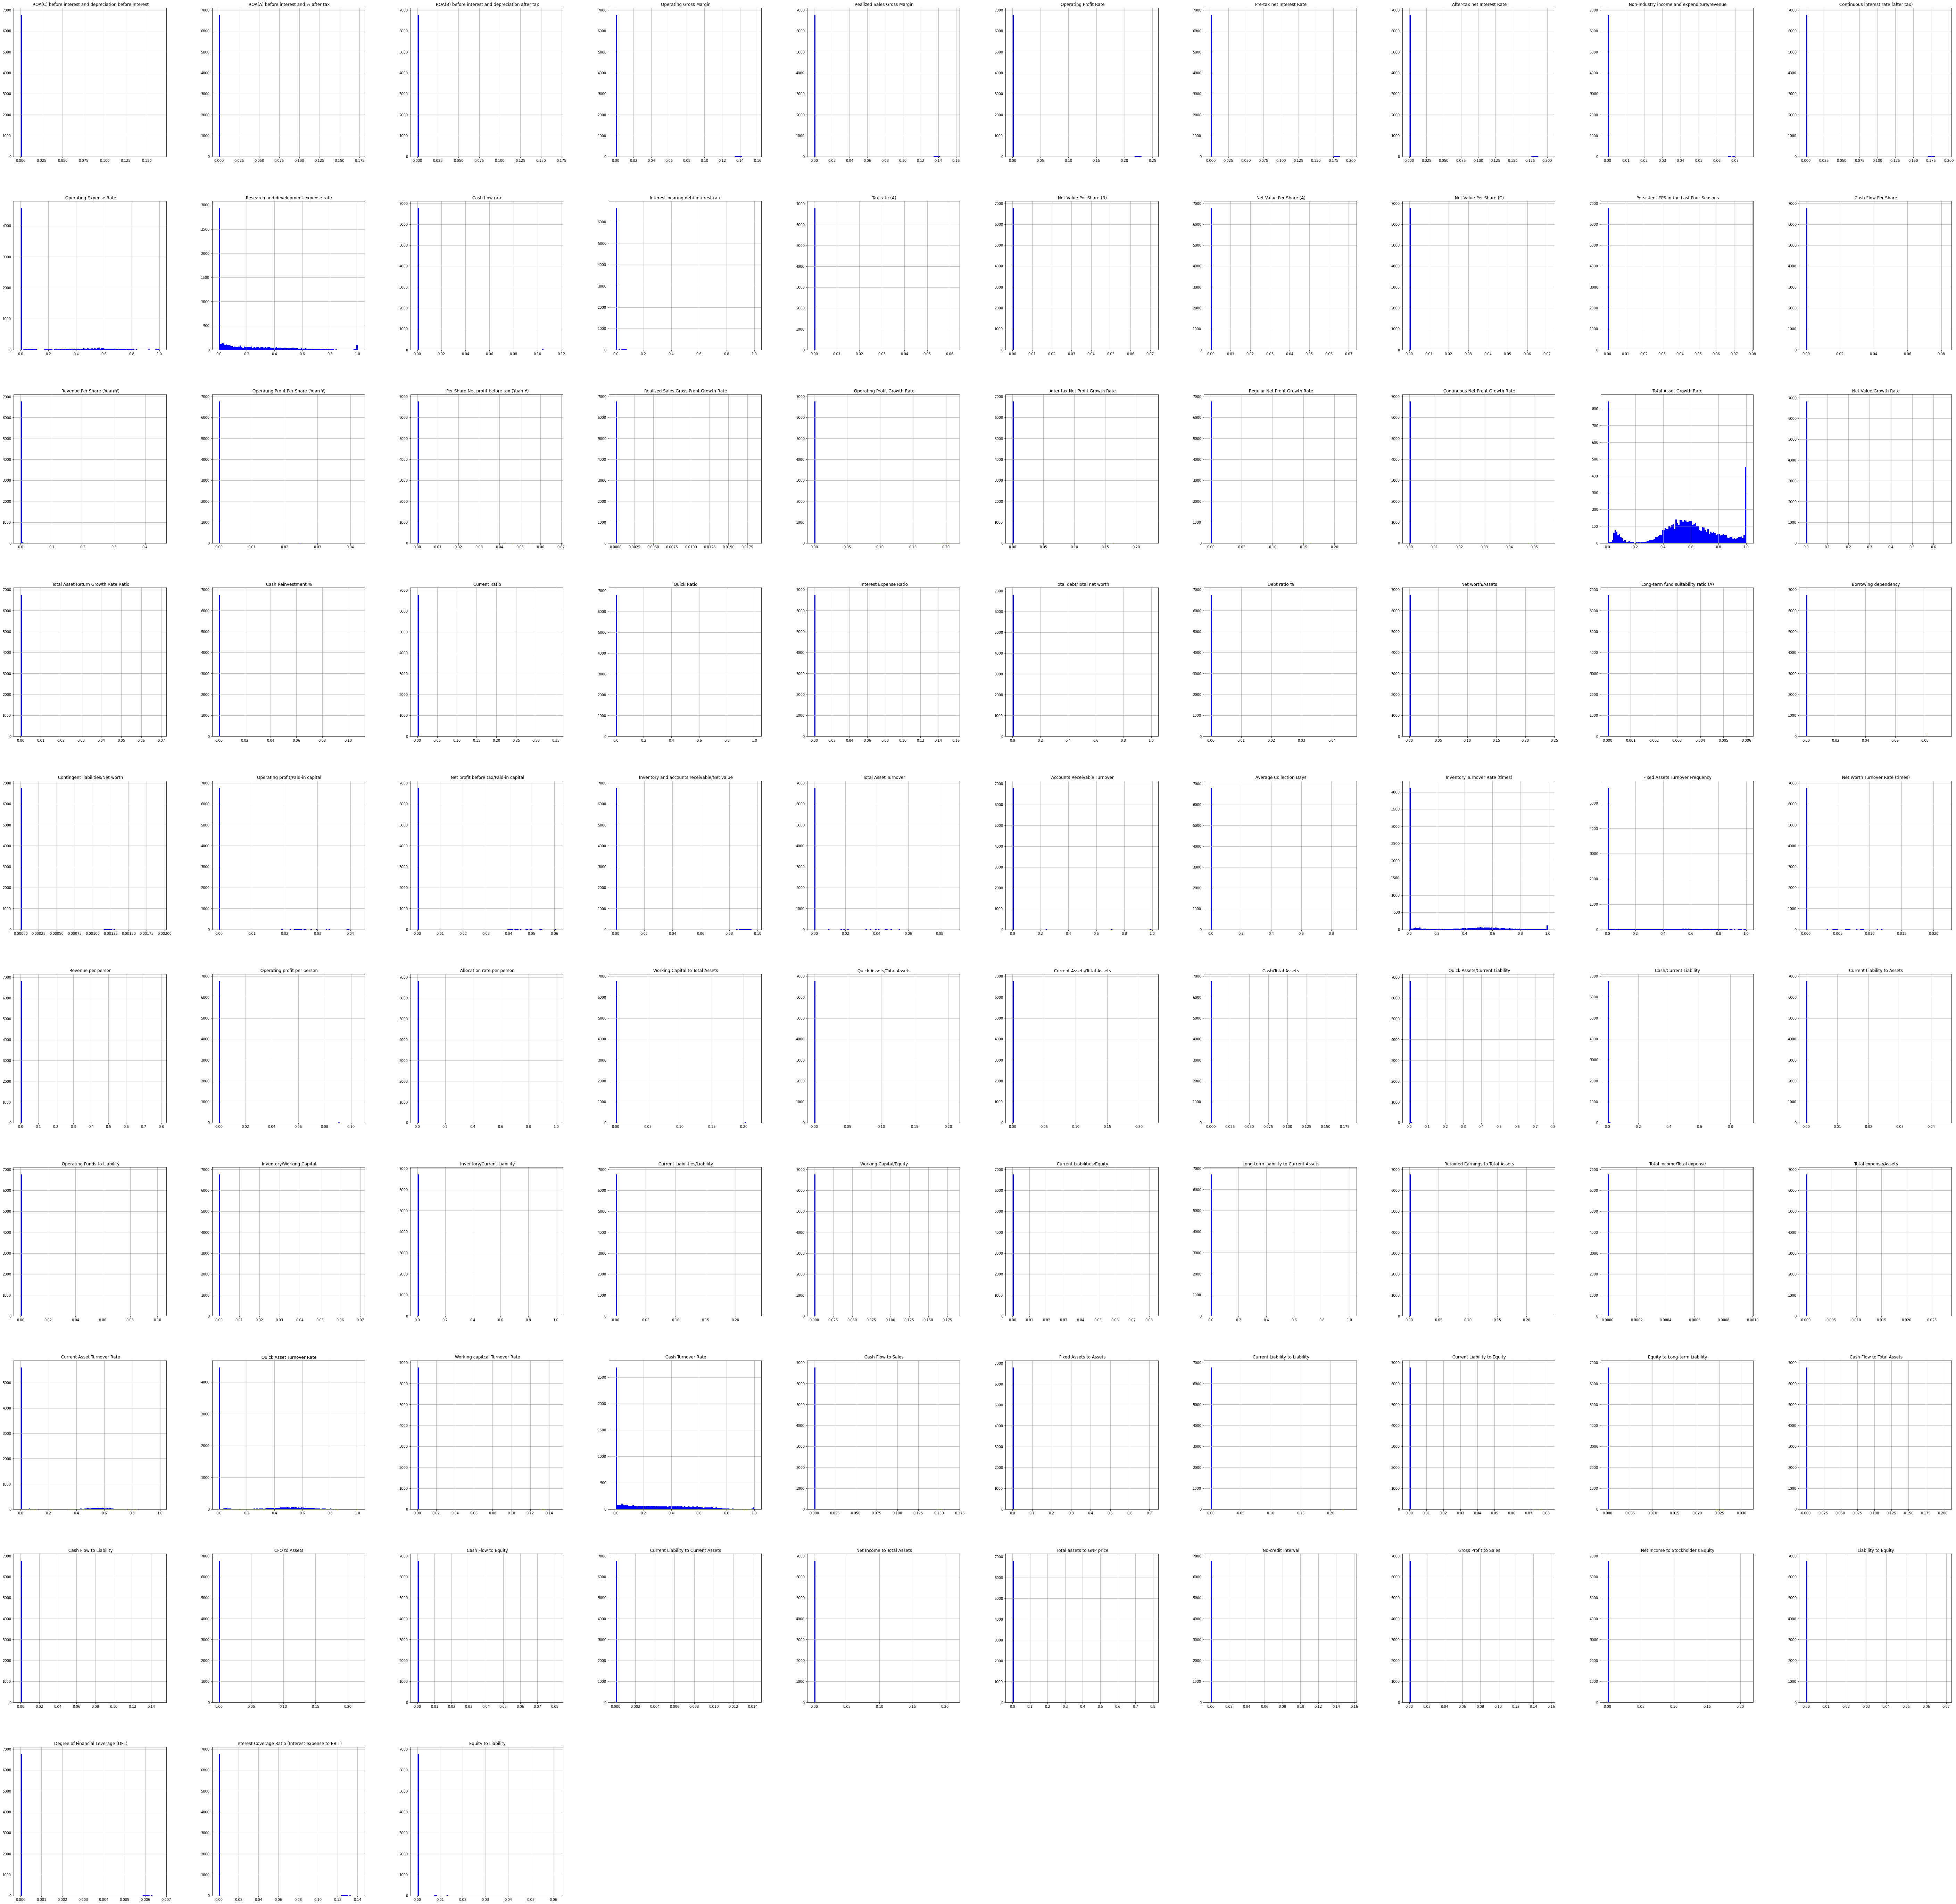

ROA(C) before interest and depreciation before interest  \
0                                       4.480822e-11          
1                                       3.359942e-11          
2                                       4.513292e-11          
3                                       2.454570e-11          
4                                       3.637695e-11          

    ROA(A) before interest and % after tax  \
0                             5.131255e-11   
1                             3.894903e-11   
2                             5.286011e-11   
3                             2.770233e-11   
4                             4.211954e-11   

    ROA(B) before interest and depreciation after tax  \
0                                       4.905885e-11    
1                                       3.739429e-11    
2                                       5.002932e-11    
3                                       2.809942e-11    
4                                       4.085741e-11    

    Operating Gross Margin   Realized Sales Gross Margin  \
0             7.272166e-11                  7.272166e-11   
1             4.416098e-11                  4.416098e-11   
2             6.371046e-11                  6.370130e-11   
3             3.582254e-11                  3.582254e-11   
4             4.684060e-11                  4.684060e-11   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0            1.207845e-10                9.635092e-11   
1            7.229089e-11                5.770415e-11   
2            1.058071e-10                8.436150e-11   
3            6.130838e-11                4.892437e-11   
4            7.814594e-11                6.237497e-11   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                  9.779242e-11                                  3.659271e-11   
1                  5.856680e-11                                  2.196752e-11   
2                  8.563096e-11                                  3.199401e-11   
3                  4.966094e-11                                  1.862208e-11   
4                  6.330881e-11                                  2.373971e-11   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                           9.442819e-11             1.519790e-14   
1                           5.655537e-11             2.097092e-14   
2                           8.265400e-11             2.501277e-14   
3                           4.795898e-11             6.623102e-15   
4                           6.113774e-11             6.172053e-01   

    Research and development expense rate   Cash flow rate  \
0                                0.000000     5.539368e-11   
1                                0.000000     3.342403e-11   
2                                0.002701     4.857022e-11   
3                                0.000000     2.858882e-11   
4                                0.000000     3.619891e-11   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                          8.766788e-14            0.0   
1                          4.682624e-14            0.0   
2                          8.369157e-14            0.0   
3                          2.756606e-14            0.0   
4                          5.366859e-14            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0              1.788850e-11              1.788850e-11   
1              1.318899e-11              1.318899e-11   
2              1.884575e-11              1.884575e-11   
3              9.465232e-12              9.465232e-12   
4              1.310309e-11              1.310309e-11   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0              1.788850e-11                              2.045064e-11   
1              1.318899e-11                              1.512068e-11   
2              2.051964e-11                              1.912855e-11   
3              9.465232e-12               

Normalized data:


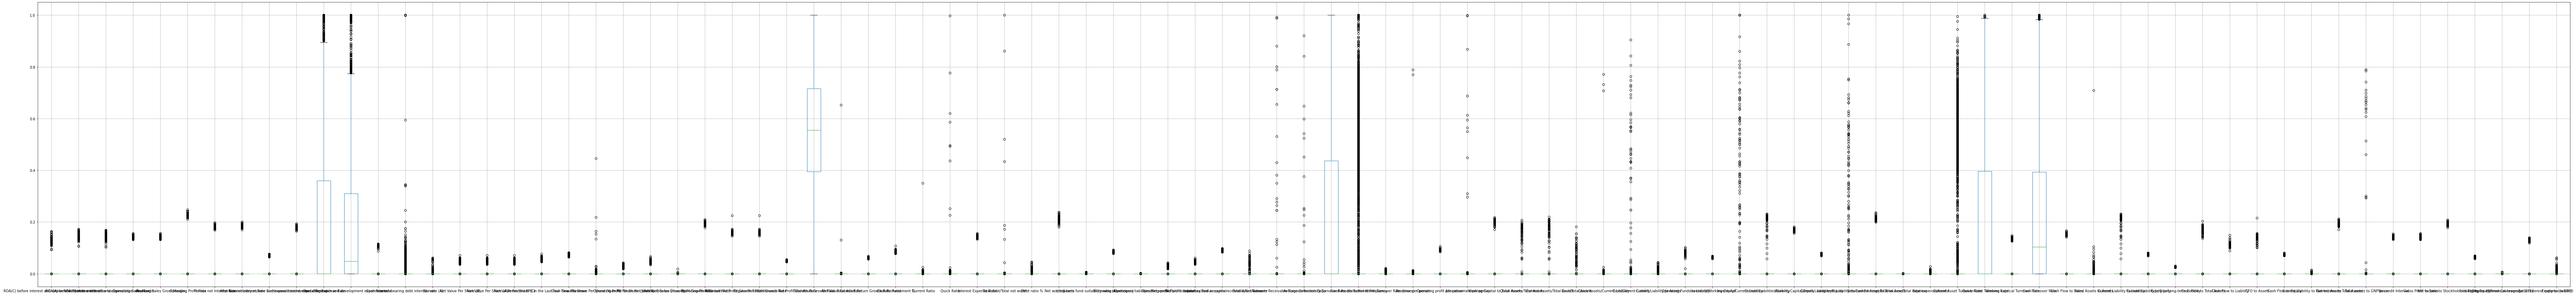

In [39]:
normalized_NumData.hist(bins= 100, figsize = (100,100), color = 'blue')
plt.show()

display(normalized_NumData.head())
print("Normalized data:")
# Drawing box plots to check for outliers
plt.figure(figsize = (130,15))
normalized_NumData.boxplot()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                                  0.180581   
3                  0.154187               

ROA(C) before interest and depreciation before interest  \
0                                          -2.217909          
1                                          -0.673828          
2                                          -1.303672          
3                                          -1.735886          
4                                          -0.661778          

    ROA(A) before interest and % after tax  \
0                                -2.045798   
1                                -0.311068   
2                                -0.908420   
3                                -1.636209   
4                                -0.307745   

    ROA(B) before interest and depreciation after tax  \
0                                          -2.400361    
1                                          -0.598450    
2                                          -1.319910    
3                                          -1.556340    
4                                          -0.508050    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                -0.383334                     -0.382638   
1                 0.135068                      0.136307   
2                -0.383759                     -0.388177   
3                -1.441418                     -1.441832   
4                -0.541238                     -0.540708   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.016456                   -0.023516   
1                0.014671                    0.014799   
2                0.007858                   -0.061111   
3               -0.004257                   -0.017313   
4                0.016758                    0.013703   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                     -0.020165                                     -0.087479   
1                      0.015966                                     -0.005957   
2                     -0.051183                                     -0.142238   
3                     -0.008676                                     -0.024491   
4                      0.016186                                     -0.013254   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                              -0.031281                -0.616334   
1                               0.009823                -0.616334   
2                              -0.086566                -0.616334   
3                              -0.011077                -0.616334   
4                               0.013300                 1.820772   

    Research and development expense rate   Cash flow rate  \
0                               -0.750713        -0.545256   
1                               -0.750713        -0.326632   
2                               -0.740898        -0.523098   
3                               -0.750713        -0.101310   
4                               -0.750713        -0.275028   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                             -0.151921      -0.829388   
1                             -0.151921      -0.829388   
2                             -0.151921      -0.829388   
3                             -0.151921      -0.829388   
4                             -0.151921      -0.829388   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                 -1.279247                 -1.275228   
1                 -0.251878                 -0.250429   
2                 -0.381876                 -0.380102   
3                 -1.092453                 -1.088901   
4                 -0.693621                 -0.691067   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                 -1.276147                                 -1.794106   
1                 -0.251550                                 -0.597379   
2                  0.090822                                 -1.450153   
3                 -1.089856               

Plain data:
Scalled data:


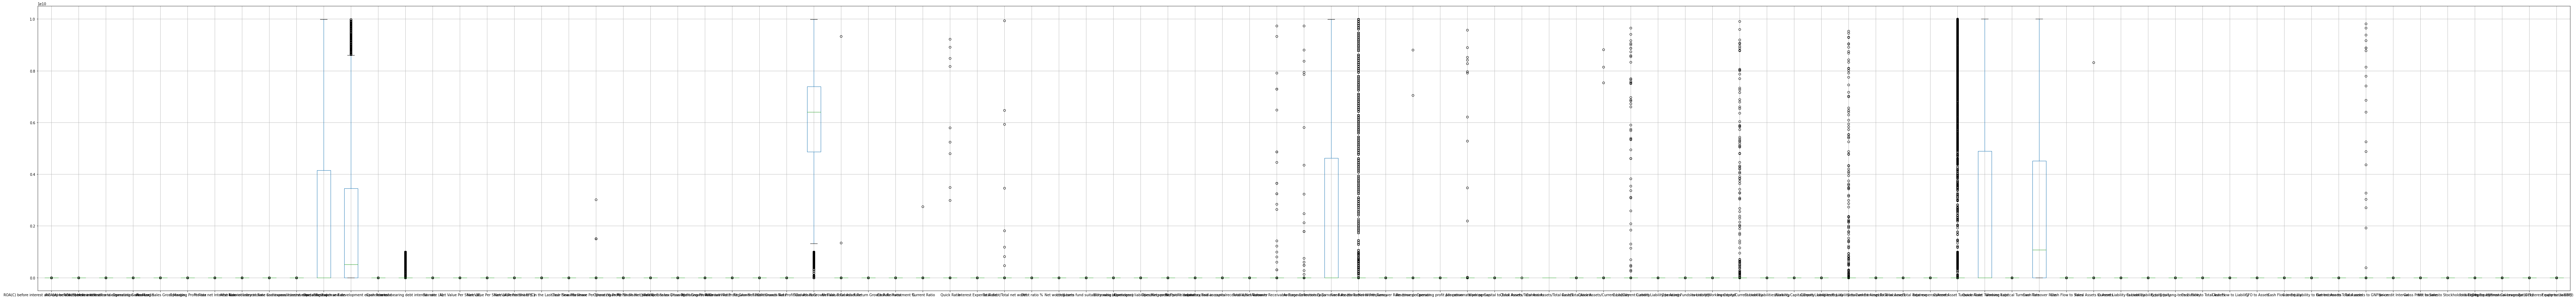

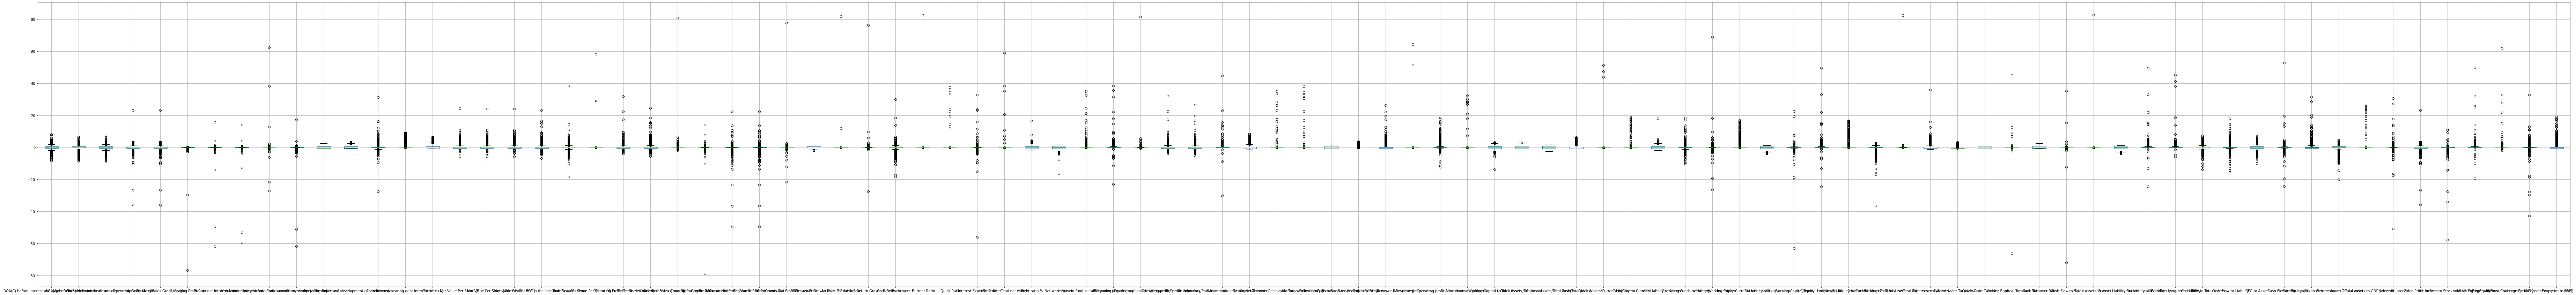

In [40]:
# Let's Standardize our dataset and see which performs better Normalization or Standardization
Standardized_data = Numerical_data.copy()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Standardized_data[Standardized_data.columns] = scaler.fit_transform(Standardized_data[Standardized_data.columns])

display(Numerical_data.head())
display(Standardized_data.head())
print("Plain data:")
# Drawing box plots to check for outliers
plt.figure(figsize = (130,15))
Numerical_data.boxplot()
print("Scalled data:")
# Drawing box plots to check for outliers
plt.figure(figsize = (130,15))
Standardized_data.boxplot()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.258227e-14   
1                               0.781506             2.900751e-14   
2                               0.780284             2.363661e-14   
3                               0.781241             1.079968e-14   
4                               0.781550             7.897898e-01   

    Research and development expense rate   Cash flow rate  \
0                                0.000000         0.458143   
1                                0.000000         0.461867   
2                                0.002555         0.458521   
3                                0.000000         0.465705   
4                                0.000000         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                          7.323965e-13            0.0   
1                          6.536007e-13            0.0   
2                          7.980596e-13            0.0   
3                          4.535807e-13            0.0   
4                          6.929986e-13            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                                  0.180581   
3                  0.154187               

Min Max Scalled Data:


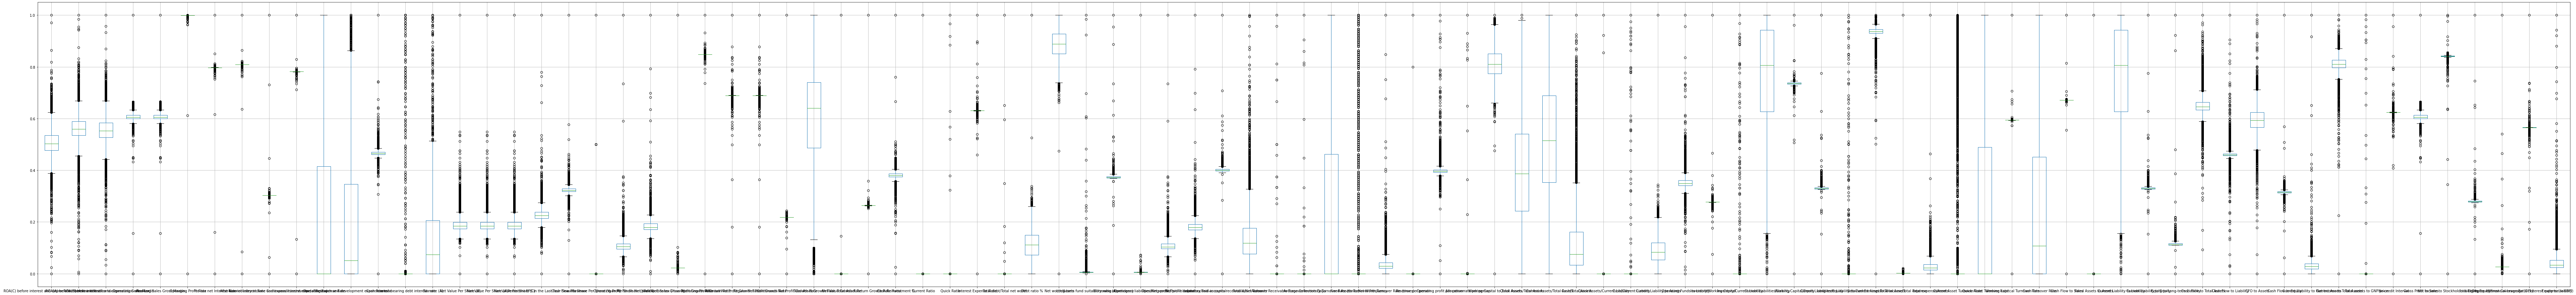

In [41]:
# Let's Also apply MinMaxScaler
MinMax_std_data = Numerical_data.copy()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
MinMax_std_data[MinMax_std_data.columns] = scaler.fit_transform(MinMax_std_data[MinMax_std_data.columns])

display(MinMax_std_data.head())
print("Min Max Scalled Data:")
# Drawing box plots to check for outliers
plt.figure(figsize = (130,15))
MinMax_std_data.boxplot()

We will further preprocess the min max standardized data since after comparing the results that would be the best option.

# Splitting

Let's now split the data into 80 percent train and 20 % test splits and apply k-fold stratified cross validation technique to further split the training data. 

In [42]:
x = data.drop(columns = ['Bankrupt?'],axis = 1)
y = data['Bankrupt?']

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 

x_train, y_train, x_test, y_test = train_test_split(x,y, test_size = 0.2,random_state = 100)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5455, 95), (1364, 95), (5455,), (1364,))

We can use techniques such as Stratified K Fold cross validation and Randomized K fold for the selection of Best parameters and others such as SMOTE, Weight introduction, PCA, etc. but these all methods are to be applied with the application of models to improve their performances. We can also measure their performance measures using different metrices from sklearn library such as Accuracy, Precision, Recall, F1 Score, MSE, R2, etc.

Since the work assigned to us was to preprocess the data, we have completed our assigned task and would continue exploring many other advanced ways to still balance our data and increase the applied model performances as future work. 

In [45]:
sf= StratifiedKFold(n_splits = 5)

for train_index, test_index in sf.split(x_train, y_train):
  sf_x_train, sf_x_test = x.iloc[train_index], x.iloc[test_index]
  sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values

ValueError: ignored